In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here is a description of each column:

age: age of the patient                                     
sex: gender of the patient (0 = female, 1 = male)                                                 
cp: chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)                                                
trestbps: resting blood pressure (in mm Hg)                                          
chol: serum cholesterol (in mg/dl)                                                           
fbs: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)                                                  
restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: maximum heart rate achieved                                                   
exang: exercise induced angina (1 = yes, 0 = no)                                                 
oldpeak: ST depression induced by exercise relative to rest                                           
slope: the slope of the peak exercise ST segment (0 = downsloping, 1 = flat, 2 = upsloping)               
ca: number of major vessels colored by fluoroscopy (0-3)                                              
thal: thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)                                
target: presence of heart disease (1 = yes, 0 = no)                                      

In [3]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [4]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# statistical measures about the data
heart_data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
heart_data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [36]:
heart_data["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [37]:
heart_data["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

<Axes: ylabel='Frequency'>

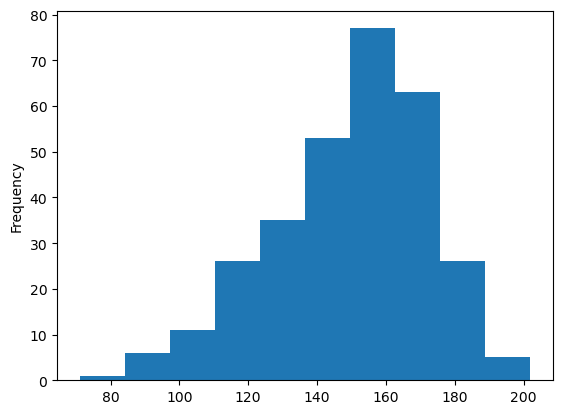

In [38]:
heart_data["thalach"].plot(kind="hist")

<Axes: >

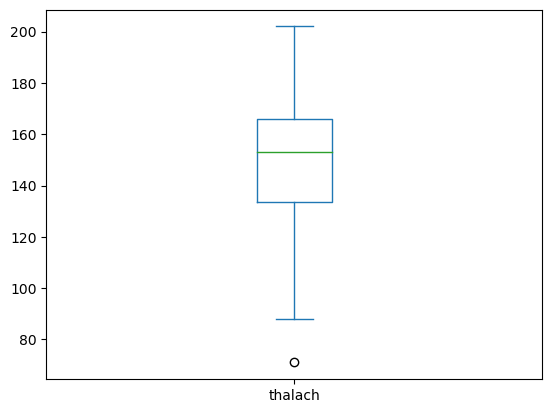

In [39]:
heart_data["thalach"].plot(kind="box")

In [40]:
heart_data["thalach"].isnull().sum()

0

In [32]:
heart_data["chol"].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [33]:
heart_data["chol"].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

<Axes: ylabel='Frequency'>

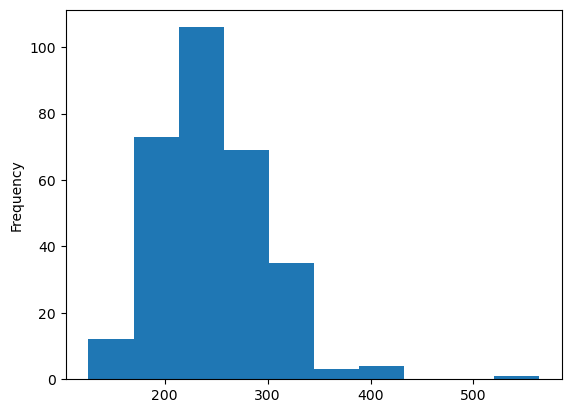

In [34]:
heart_data["chol"].plot(kind="hist")

<Axes: >

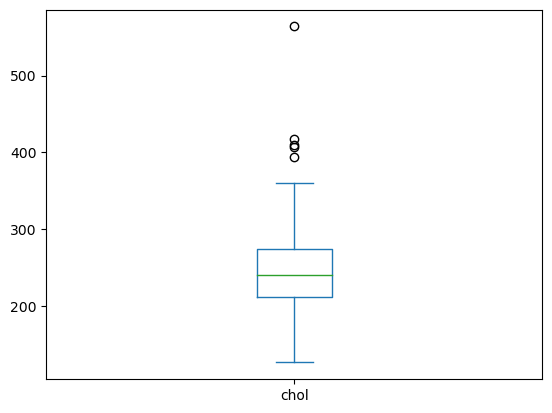

In [35]:
heart_data["chol"].plot(kind="box")

In [41]:
heart_data["chol"].isnull().sum()

0

In [28]:
heart_data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [29]:
heart_data["cp"].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

<Axes: ylabel='Frequency'>

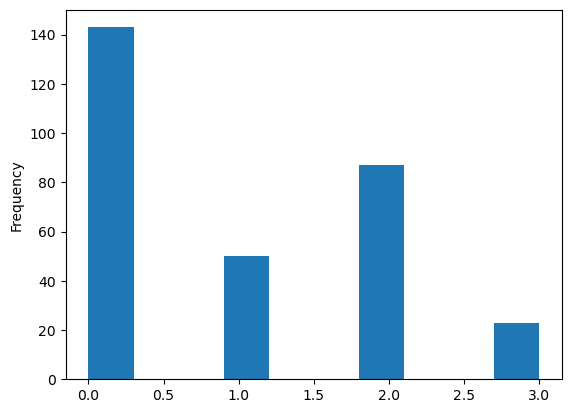

In [30]:
heart_data["cp"].plot(kind="hist")

<Axes: >

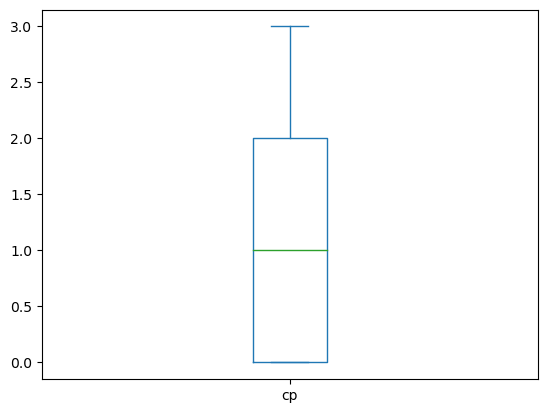

In [31]:
heart_data["cp"].plot(kind="box")

In [42]:
heart_data["cp"].isnull().sum()

0

In [24]:
heart_data["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [25]:
heart_data["sex"].describe()

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

<Axes: ylabel='Frequency'>

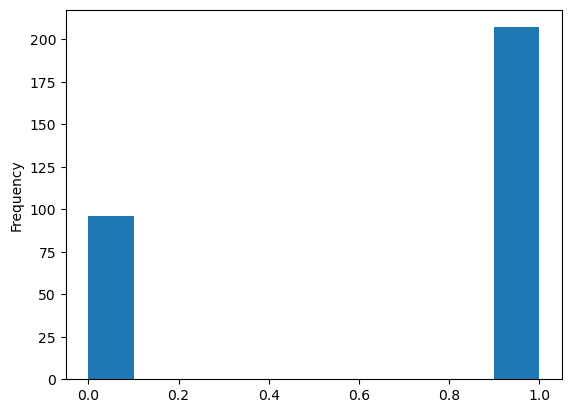

In [26]:
heart_data["sex"].plot(kind="hist")

In [43]:
heart_data["sex"].isnull().sum()

0

In [15]:
heart_data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

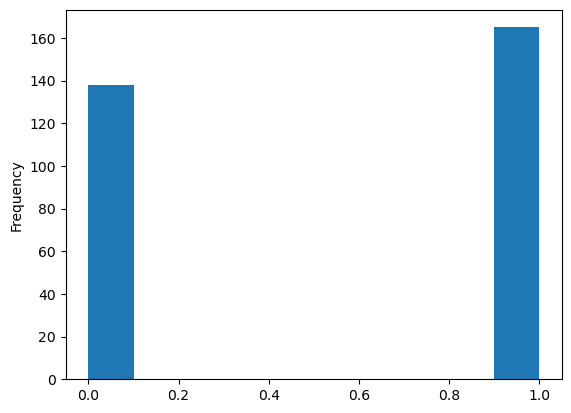

In [16]:
heart_data["target"].plot(kind="hist")

<Axes: ylabel='Density'>

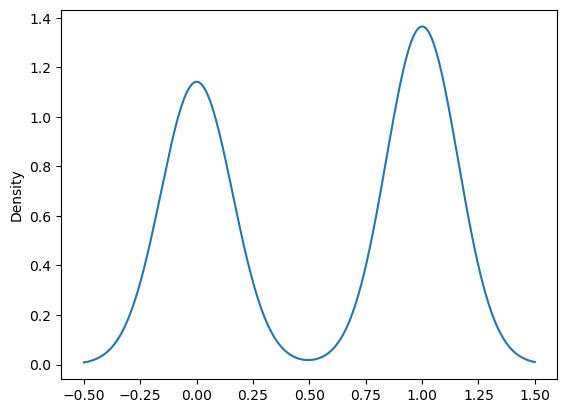

In [18]:
heart_data["target"].plot(kind="kde")

In [44]:
heart_data["target"].isnull().sum()

0

In [19]:
heart_data["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

<Axes: ylabel='Frequency'>

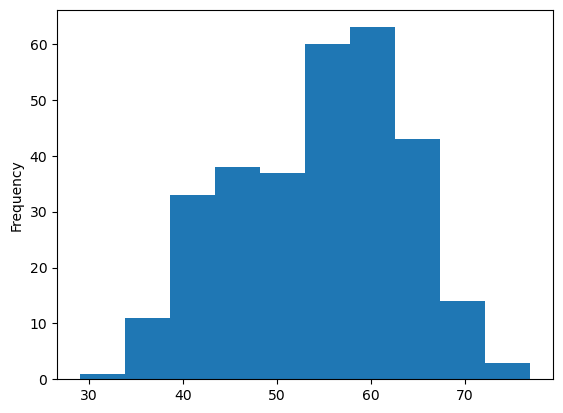

In [20]:
heart_data["age"].plot(kind="hist")

In [22]:
heart_data["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

<Axes: >

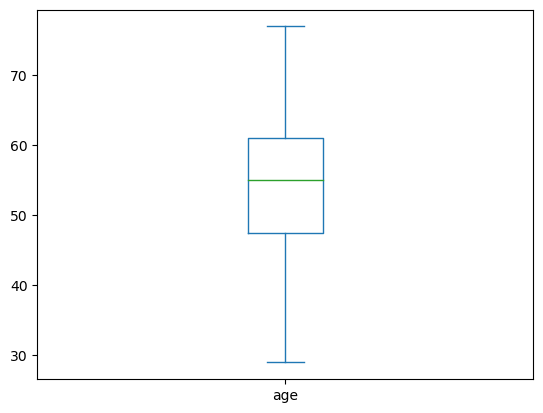

In [23]:
heart_data["age"].plot(kind="box")

In [45]:
heart_data["age"].isnull().sum()

0

In [7]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [9]:
model = LogisticRegression()
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_data_accuracy)

0.8512396694214877


In [11]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.819672131147541

# Prediction System

In [12]:
input_data = (43,1,0,120,177,0,0,120,1,2.5,1,0,3)
np_data = np.asarray(input_data)
reshaped_df = np_data.reshape(1,-1)
pred = model.predict(reshaped_df)
if pred[0] == 0:
    print("the person doesnt have a heart disease")
else:
    print('the person does have a heart desease')

the person doesnt have a heart disease


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
